### import modules

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import plotly
import seaborn as sns

## Import csv files

In [66]:
survey = r'https://raw.githubusercontent.com/Stephen-Cole267/Data_Science_Project_HR_Analytics/Master/Datasets/employee_survey_data.csv?raw=true'
general = r'https://raw.githubusercontent.com/Stephen-Cole267/Data_Science_Project_HR_Analytics/Master/Datasets/general_data.csv?raw=true'
in_time = r'https://raw.githubusercontent.com/Stephen-Cole267/Data_Science_Project_HR_Analytics/Master/Datasets/in_time.csv?raw=true'
manager = r'https://raw.githubusercontent.com/Stephen-Cole267/Data_Science_Project_HR_Analytics/Master/Datasets/manager_survey_data.csv?raw=true'
out_time = r'https://raw.githubusercontent.com/Stephen-Cole267/Data_Science_Project_HR_Analytics/Master/Datasets/out_time.csv?raw=true'

In [67]:
survey_table = pd.read_csv(survey,index_col=0)
general_table = pd.read_csv(general)
in_time_table = pd.read_csv(in_time,index_col=0)
manager_table = pd.read_csv(manager,index_col=0)
out_time_table = pd.read_csv(out_time,index_col=0)


## Initial observation

In [68]:
survey_table.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
EmployeeID,,,
1,3.0,4.0,2.0
2,3.0,2.0,4.0
3,2.0,2.0,1.0
4,4.0,4.0,3.0
5,4.0,1.0,3.0


In [69]:
survey_table.shape

(4410, 3)

In [70]:
general_table.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [71]:
general_table.shape

(4410, 24)

In [72]:
in_time_table.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,NaN,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,NaN,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,NaN,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,NaN,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [73]:
in_time_table.shape

(4410, 261)

In [74]:
manager_table.head()

,JobInvolvement,PerformanceRating
EmployeeID,,
1,3,3
2,2,4
3,3,3
4,2,3
5,3,3


In [75]:
manager_table.shape

(4410, 2)

In [76]:
out_time_table.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,NaN,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,NaN,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,NaN,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,NaN,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,NaN,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [77]:
out_time_table.shape

(4410, 261)

## merging tables

In [78]:
## Merging the general table and the survey tables
df = survey_table.merge(general_table,left_on='EmployeeID',right_on='EmployeeID')

In [79]:
df = df.merge(manager_table,left_on='EmployeeID',right_on='EmployeeID')

In [80]:
df.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,...,11,8,0,1.0,6,1,0,0,3,3
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,...,23,8,1,6.0,3,5,1,4,2,4
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,...,15,8,3,5.0,2,5,0,3,3,3
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,...,11,8,3,13.0,5,8,7,5,2,3
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,...,12,8,2,9.0,2,6,0,4,3,3


## Data wrangling

## Duplicates

In [81]:
df.shape

(4410, 29)

In [82]:
df = df.drop_duplicates()

In [83]:
df.shape

(4410, 29)

### Null values

In [84]:
# Find null values
null_values = df.isnull()
# print nulls
for column in null_values.columns.values.tolist():
    print(column)
    print(null_values[column].value_counts())
    print("")

EmployeeID
False    4410
Name: EmployeeID, dtype: int64

EnvironmentSatisfaction
False    4385
True       25
Name: EnvironmentSatisfaction, dtype: int64

JobSatisfaction
False    4390
True       20
Name: JobSatisfaction, dtype: int64

WorkLifeBalance
False    4372
True       38
Name: WorkLifeBalance, dtype: int64

Age
False    4410
Name: Age, dtype: int64

Attrition
False    4410
Name: Attrition, dtype: int64

BusinessTravel
False    4410
Name: BusinessTravel, dtype: int64

Department
False    4410
Name: Department, dtype: int64

DistanceFromHome
False    4410
Name: DistanceFromHome, dtype: int64

Education
False    4410
Name: Education, dtype: int64

EducationField
False    4410
Name: EducationField, dtype: int64

EmployeeCount
False    4410
Name: EmployeeCount, dtype: int64

Gender
False    4410
Name: Gender, dtype: int64

JobLevel
False    4410
Name: JobLevel, dtype: int64

JobRole
False    4410
Name: JobRole, dtype: int64

MaritalStatus
False    4410
Name: MaritalStatus, dtype: int

In [85]:
df.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,...,11,8,0,1.0,6,1,0,0,3,3
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,...,23,8,1,6.0,3,5,1,4,2,4
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,...,15,8,3,5.0,2,5,0,3,3,3
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,...,11,8,3,13.0,5,8,7,5,2,3
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,...,12,8,2,9.0,2,6,0,4,3,3


In [86]:
### replace nulls in categorical columns with the mode 
cn = ['EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance']

for c in cn:
    m = df[c].mode()
    df[c] = df[c].fillna(int(m))

### NumCompaniesWorked has a low level of variance, therefore replace nulls with the mean values

df['NumCompaniesWorked'] = df['NumCompaniesWorked'].fillna(int(df['NumCompaniesWorked'].mean()))

### TotalWorkingYears has a high level of skew, exacerbated by employees that have worked for over 35 years, therefore replace null values with the median values

df['TotalWorkingYears'] = df['TotalWorkingYears'].fillna(int(df['TotalWorkingYears'].median()))



## Data types

In [87]:
st = ['EmployeeID']
cat = ['Department','EducationField','JobRole','MaritalStatus','BusinessTravel']
integ = ['Age','Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','NumCompaniesWorked', 'PerformanceRating','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','Attrition','Gender']
flt = ['MonthlyIncome','PercentSalaryHike']

In [88]:
df['Gender'].unique()
df['Attrition'].unique()

array(['No', 'Yes'], dtype=object)

In [89]:
### convert binary to 0 and 1

df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})

In [90]:
df['Attrition'].unique()

array([0, 1], dtype=int64)

In [91]:
##### Convert string to string type
df[st] = df[st].astype('object')

In [92]:
### Function to convert all columns to correct type
def con(l):
    for col in l:
        if col in cat:
            df[col] = df[col].astype('category')
        elif col in integ:
            df[col] = df[col].astype('int64')
        elif col in flt:
            df[col] = df[col].astype('float64')       


In [93]:
### convert categorical columns
con(cat)
### convert int columns
con(integ)
###
con(flt)

In [94]:
## Column over 18 has Yes for all rows, therefore is redundant. Dropping column.

df = df.drop(columns='Over18')

In [95]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   EmployeeID               4410 non-null   object  
 1   EnvironmentSatisfaction  4410 non-null   int64   
 2   JobSatisfaction          4410 non-null   int64   
 3   WorkLifeBalance          4410 non-null   int64   
 4   Age                      4410 non-null   int64   
 5   Attrition                4410 non-null   int64   
 6   BusinessTravel           4410 non-null   category
 7   Department               4410 non-null   category
 8   DistanceFromHome         4410 non-null   int64   
 9   Education                4410 non-null   int64   
 10  EducationField           4410 non-null   category
 11  EmployeeCount            4410 non-null   int64   
 12  Gender                   4410 non-null   int64   
 13  JobLevel                 4410 non-null   int64   
 14  JobRole 

### Sanity checks

In [96]:
def summary(o):
    print(df[o].describe())

def v(p):
    print(df[p].unique())


As all employees are above 18, the age range should be between 18 and retirement age

In [97]:
summary('Age')

count    4410.000000
mean       36.923810
std         9.133301
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64


Departments should contain no spelling errors

In [98]:
v('Department')

['Sales', 'Research & Development', 'Human Resources']
Categories (3, object): ['Human Resources', 'Research & Development', 'Sales']


education should be from 1 to 5

In [99]:
v('Education')

[2 1 4 5 3]


environment satisfaction should range from 1 to 4

In [100]:
v('EnvironmentSatisfaction')

[3 2 4 1]


Age - years at company should be greater than 18

In [101]:
inv = df[(df['Age']-df['YearsAtCompany']) < 18]

In [102]:
inv.shape

(0, 28)

years since last promotion should be smaller than years at the company

In [103]:
yy = df[(df['YearsAtCompany']-df['YearsSinceLastPromotion']) < 0]
yy.shape

(0, 28)

standard hours of work should be within the legal range for part/full time employment

In [104]:
summary('StandardHours')

count    4410.0
mean        8.0
std         0.0
min         8.0
25%         8.0
50%         8.0
75%         8.0
max         8.0
Name: StandardHours, dtype: float64


Standard hours is all 8 hours. Therefore we can drop this column

In [105]:
df = df.drop(columns='StandardHours')

### Outliers

In [106]:
numerical_columns = integ + flt

df[numerical_columns].describe()

,Age,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Gender,MonthlyIncome,PercentSalaryHike
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,2.912925,2.725170,2.729932,2.063946,2.734014,2.691837,3.153741,0.793878,11.277324,2.799320,2.763492,7.008163,2.187755,4.123129,0.161224,0.600000,65029.312925,15.209524
std,9.133301,1.023933,1.089852,0.711400,1.106689,1.102071,2.493912,0.360742,0.851883,7.774490,1.288978,0.703541,6.125135,3.221699,3.567327,0.367780,0.489954,47068.888559,3.659108
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10090.000000,11.000000
25%,30.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,3.000000,0.000000,6.000000,2.000000,2.000000,3.000000,0.000000,2.000000,0.000000,0.000000,29110.000000,12.000000
50%,36.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,1.000000,3.000000,0.000000,1.000000,49190.000000,14.000000
75%,43.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,1.000000,15.000000,3.000000,3.000000,9.000000,3.000000,7.000000,0.000000,1.000000,83800.000000,18.000000
max,60.000000,5.000000,4.000000,4.000000,5.000000,4.000000,9.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,17.000000,1.000000,1.000000,199990.000000,25.000000


monthly income has several outliers above q3 + 1.5(q3-q1). Removing these

In [107]:
q3 = df['MonthlyIncome'].quantile(q=0.75)
q1 = df['MonthlyIncome'].quantile(q=0.25)
iqr = q3 - q1
lim = q3 + (1.5*iqr)

df = df[df['MonthlyIncome'] < lim]

In [108]:
df.shape

(4068, 27)

### Binning Continuous variables

In [109]:
df['DistanceFromHome'].describe()

count    4068.000000
mean        9.214602
std         8.072326
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

In [110]:
cont = ['PercentSalaryHike','MonthlyIncome','DistanceFromHome']

### Bin monthly income
bins1 = [0,25000,50000,75000,100000,166000]
bins_labels1 = ["less than 25,000","25,000-50,000","50,000-75,000","75,000-100,000","100,000+"]
df["MonthlyIncome"] = pd.cut(df["MonthlyIncome"],bins=bins1,labels=bins_labels1)

### Bin PercentSalaryHike
bins2 = [0,5,10,15,20,26]
bins_labels2 = ["less than 5%","5-10%","10-15%","15-20%","20%+"]
df["PercentSalaryHike"] = pd.cut(df["PercentSalaryHike"],bins=bins2,labels=bins_labels2)

### Bin YearsSinceLastPromotion
bins3 = [0,5,10,15,20]
bins_labels3= ["less than 5","5-10","10-15","15+"]
df["YearsSinceLastPromotion"] = pd.cut(df["YearsSinceLastPromotion"],bins=bins3,labels=bins_labels3)

### Bin YearsWithCurrManager
bins4 = [0,5,10,15,20]
bins_labels4= ["less than 5","5-10","10-15","15+"]
df["YearsWithCurrManager"] = pd.cut(df["YearsWithCurrManager"],bins=bins4,labels=bins_labels4)

## Bin Distance From Home
bins5 = [0,5,10,15,20,29]
bins_labels5 = ["less than 5km","5-10km","10-15km","15-20km","20+km"]
df["DistanceFromHome"] = pd.cut(df["DistanceFromHome"],bins=bins5,labels=bins_labels5)

## Time feature formatting

In [111]:
## dropping all empty columns in in_time table
for col in in_time_table:
    if in_time_table[col].isna().sum() == len(in_time_table):
        in_time_table = in_time_table.drop(columns=col)

In [112]:
## dropping all empty columns in out_time table
for col in out_time_table:
    if out_time_table[col].isna().sum() == len(out_time_table):
        out_time_table = out_time_table.drop(columns=col)

In [113]:
# Find null values
null_values = in_time_table.isnull()
# print nulls
for column in null_values.columns.values.tolist():
    print(column)
    print(null_values[column].value_counts())
    print("")

2015-01-02
False    4201
True      209
Name: 2015-01-02, dtype: int64

2015-01-05
False    4204
True      206
Name: 2015-01-05, dtype: int64

2015-01-06
False    4182
True      228
Name: 2015-01-06, dtype: int64

2015-01-07
False    4201
True      209
Name: 2015-01-07, dtype: int64

2015-01-08
False    4167
True      243
Name: 2015-01-08, dtype: int64

2015-01-09
False    4195
True      215
Name: 2015-01-09, dtype: int64

2015-01-12
False    4171
True      239
Name: 2015-01-12, dtype: int64

2015-01-13
False    4145
True      265
Name: 2015-01-13, dtype: int64

2015-01-15
False    4174
True      236
Name: 2015-01-15, dtype: int64

2015-01-16
False    4146
True      264
Name: 2015-01-16, dtype: int64

2015-01-19
False    4182
True      228
Name: 2015-01-19, dtype: int64

2015-01-20
False    4169
True      241
Name: 2015-01-20, dtype: int64

2015-01-21
False    4170
True      240
Name: 2015-01-21, dtype: int64

2015-01-22
False    4170
True      240
Name: 2015-01-22, dtype: int64

2015-0

In [114]:
for col in in_time_table:
    in_time_table[col] =  in_time_table[col].astype('datetime64')

In [115]:
for col in out_time_table:
    out_time_table[col] =  out_time_table[col].astype('datetime64')

In [116]:
hrs_worked = pd.DataFrame()

In [117]:
for col in in_time_table:
    hrs_worked[col] = (out_time_table[col] - in_time_table[col])

C:\Users\LOUISJ~1\AppData\Local\Temp/ipykernel_11044/3164848884.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  hrs_worked[col] = (out_time_table[col] - in_time_table[col])


In [118]:
hrs_worked.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
1,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,...,NaT,NaT,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
2,0 days 08:06:33,0 days 07:27:17,NaT,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days 07:36:47,0 days 07:43:39,...,0 days 07:55:42,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,NaT,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
3,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days 07:26:18,0 days 07:12:37,...,0 days 07:13:06,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11
4,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,0 days 06:52:36,0 days 06:54:28,...,0 days 07:27:21,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59
5,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,0 days 08:15:36,0 days 08:24:13,...,0 days 08:19:12,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05


In [119]:
l = hrs_worked.columns.to_list()

In [120]:
jj = pd.merge(general_table,hrs_worked,left_index=True,right_index=True)

In [121]:
columnsdf = l + ['Attrition','EmployeeID']

In [122]:
hrdf = jj[columnsdf]

## EDA

In [123]:
pt = ['#06A099','#A06FF3','#32ACFF','#D2F6E6','#F16B83']


# function for plotting the count plot features wrt default ratio
def plotUnivariateRatioBar(feature, data=df, figsize=(10,5), rsorted=True):
    plt.figure(figsize=figsize)
    if rsorted:
        feature_dimension = sorted(data[feature].unique())
    else:
        feature_dimension = data[feature].unique()
    feature_values = []
    for fd in feature_dimension:
        feature_filter = data[data[feature]==fd]
        feature_count = len(feature_filter[feature_filter['Attrition']==1])
        feature_values.append(feature_count*100/feature_filter['Attrition'].count())
    plt.bar(feature_dimension, feature_values, color='#06A099', edgecolor='white')
    plt.title("Attrition Rate with respect to"+str(feature)+" "+" feature - countplot")
    plt.xlabel(feature, fontsize=16)
    plt.ylabel("Attrition %", fontsize=16)
    plt.show()

    
# function to plot univariate with default status scale 0 - 1
def plotUnivariateBar(x, figsize=(15,5)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y='Attrition', data=df, palette =sns.color_palette(pt,5))
    plt.title("Attrition Rate with respect to"+str(x)+" feature - countplot")
    plt.xlabel(x, fontsize=16)
    plt.ylabel("Attrition ratio", fontsize=16)
    plt.show()
    
### Function to plot bivariate analysis with default status scale 0 - 1

def plotScatter(x, y):
    plt.figure(figsize=(16,6))
    sns.scatterplot(x=x, y=y, hue='Attrition', data=df)
    plt.title("Scatter plot between "+x+" and "+y)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()

def plotBivariateBar(x, hue, figsize=(16,6)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y='Attrition', hue=hue, data=df,palette =sns.color_palette(pt,5))
    plt.title("Attrition Ratio wrt "+x+" feature for hue "+hue+" in the data using countplot")
    plt.xlabel(x, fontsize=16)
    plt.ylabel("Ratio of Attrition", fontsize=16)
    plt.show()
    
    
    
# function to plot boxplot for comparing two features
def plotBox(x, y, hue="Attrition"):
    plt.figure(figsize=(16,6))
    sns.boxplot(x=x, y=y, data=df, hue=hue, order=sorted(df[x].unique()),palette ='rocket')
    plt.title("Box plot between "+x+" and "+y+" for each "+hue)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()
    plt.figure(figsize=(16,8))
    sns.violinplot(x=x, y=y, data=df, hue=hue, order=sorted(df[x].unique()), palette ='rocket')
    plt.title("Violin plot between "+x+" and "+y+" for each "+hue)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()

### How did Age Affect The propensity for worker attrition?

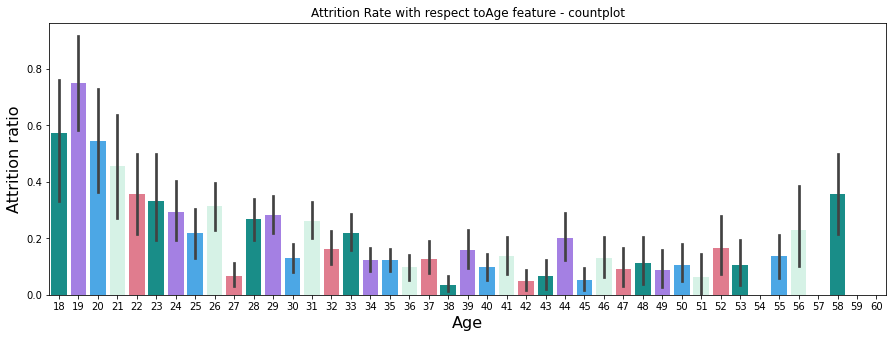

In [124]:
plotUnivariateBar('Age')

The findings from this graph seem to hint that younger workers may be more inclined to seek work elsewhere. The could be caused by lower levels of financial security and a lack of long-term awareness. As workers move into their early 30's we see a sharp reduction to below 5% attrition rate from a high of over 50% in the late teens to early 20's

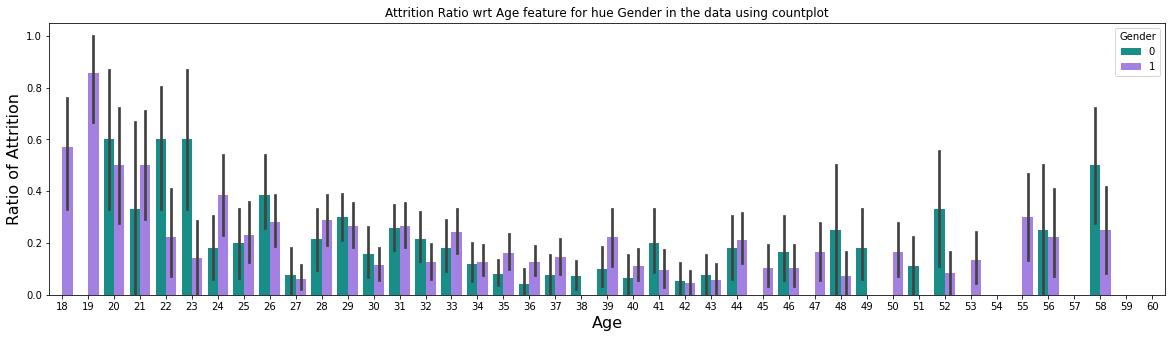

In [125]:
plotBivariateBar('Age','Gender',figsize=(20,5))

Adding further evidence to this theory, when we incorporate gender, we still see far higher instances of of Attrition in the younger workforce. As We look past the mid 40's we begin to see women leave the workforce at a greater proportion than men.

## How is Attrition affected by level of education

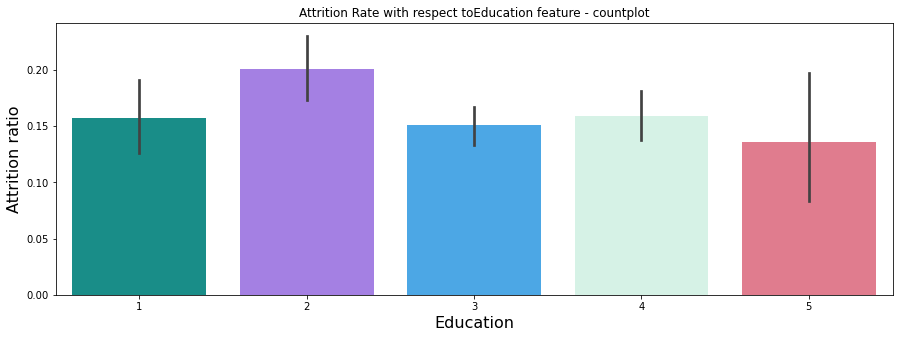

In [126]:
plotUnivariateBar('Education')

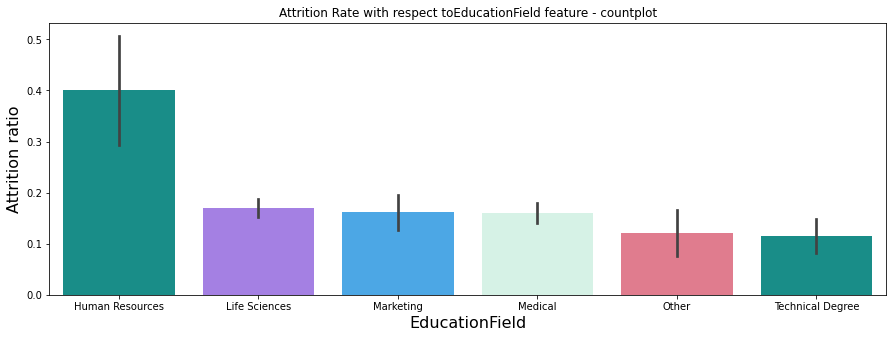

In [127]:
plotUnivariateBar('EducationField')

We See insignificant variation by education level. College educated workers may be slightly more inclined to seek work elsewhere, however, there is insufficient evidence to claim this.

## How does DistanceFromHome affect Attrition?

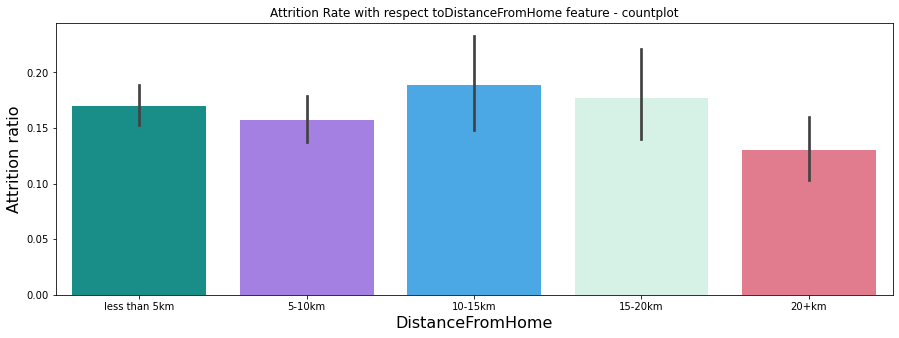

In [128]:
plotUnivariateBar('DistanceFromHome')

### How does Environment Satisfaction affect Attrition Rate

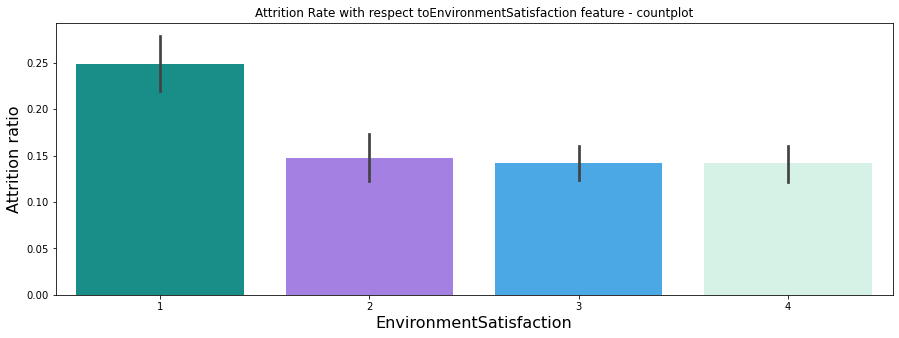

In [129]:
plotUnivariateBar('EnvironmentSatisfaction')

### How does Job Involvement affect Attrition

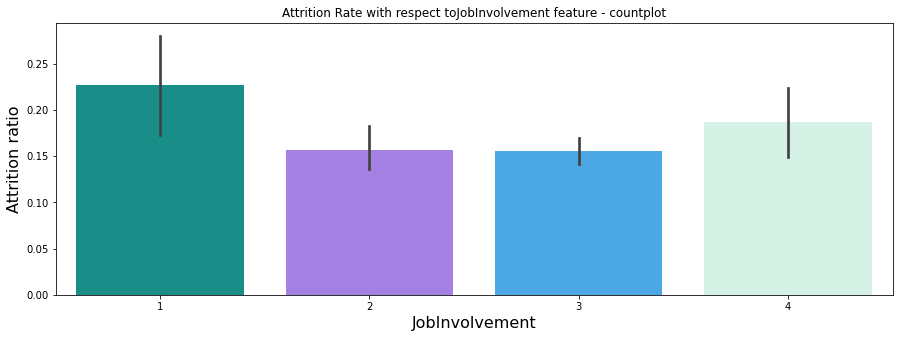

In [130]:
plotUnivariateBar('JobInvolvement')

## How does Job level affect attrition

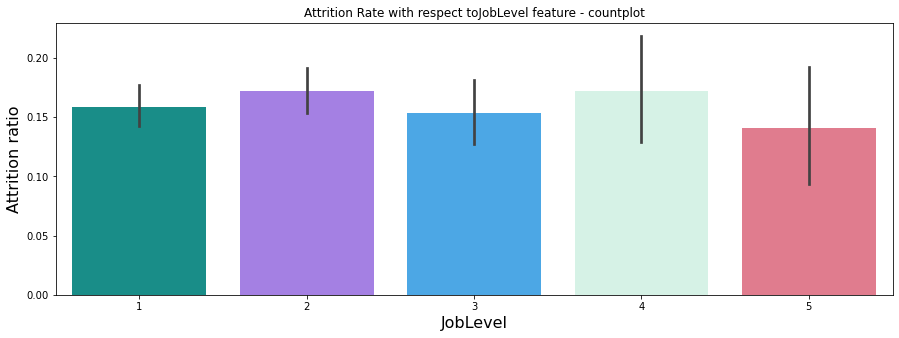

In [131]:
plotUnivariateBar('JobLevel')

## How does Job satisfaction affect Attrition

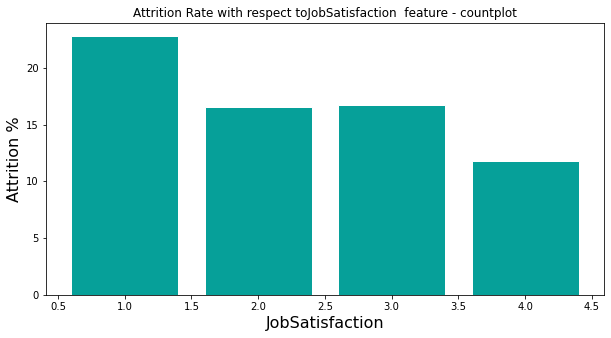

In [132]:
plotUnivariateRatioBar('JobSatisfaction')

## How does Marital Status affect Attrition

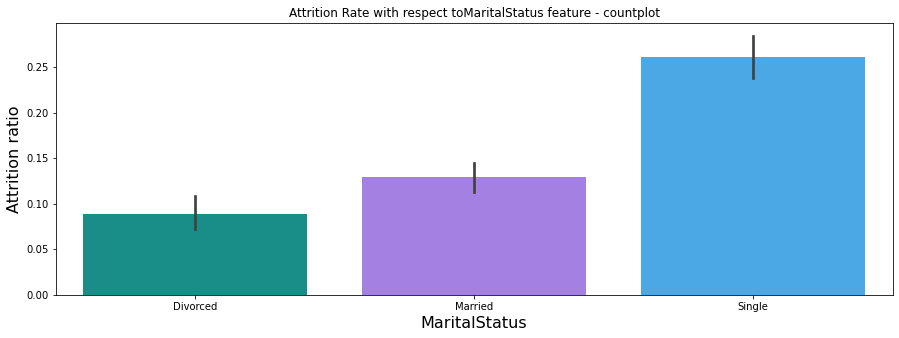

In [133]:
plotUnivariateBar('MaritalStatus')

People who are single appear over twice as likely to leave a position as the closest category.

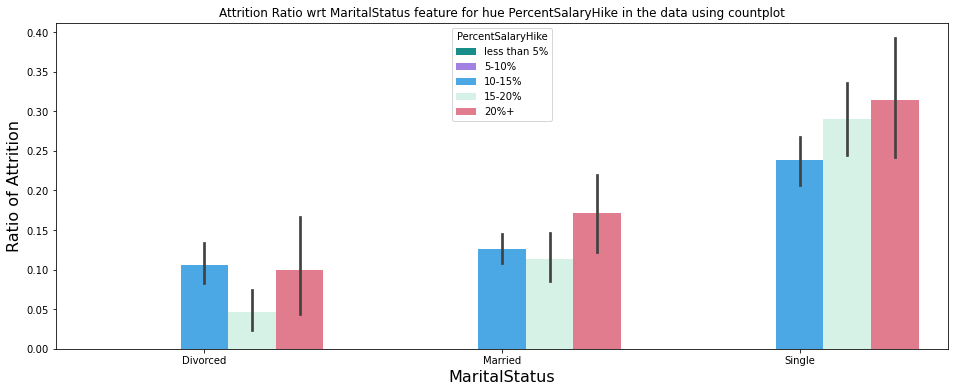

In [134]:
plotBivariateBar('MaritalStatus','PercentSalaryHike')

Amongst Single people, this seems to be irrespective of increases in Salary

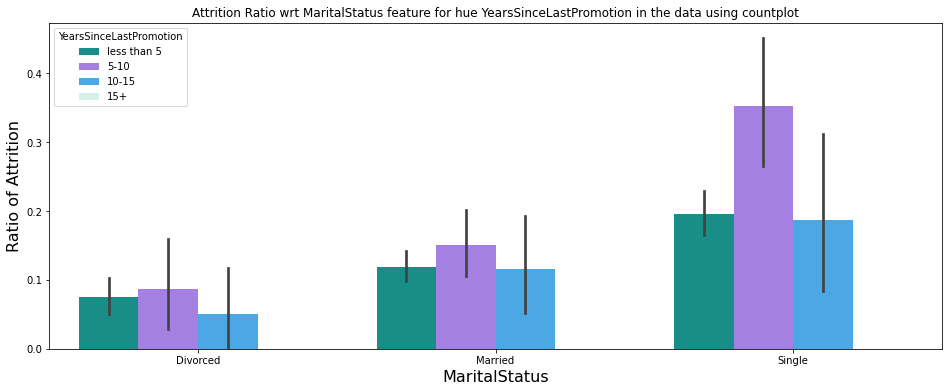

In [135]:
plotBivariateBar('MaritalStatus','YearsSinceLastPromotion')

However, This spikes for single workers who have been working for 5-10 years without a promotion

## How does monthly income affect Attrition Rate?

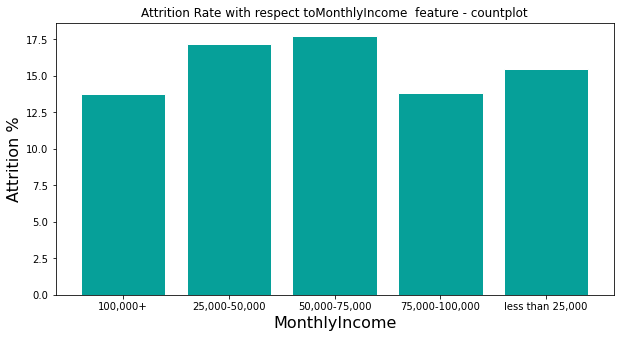

In [136]:
plotUnivariateRatioBar('MonthlyIncome')

## How does total number of companies worked affect Attrition Rate?

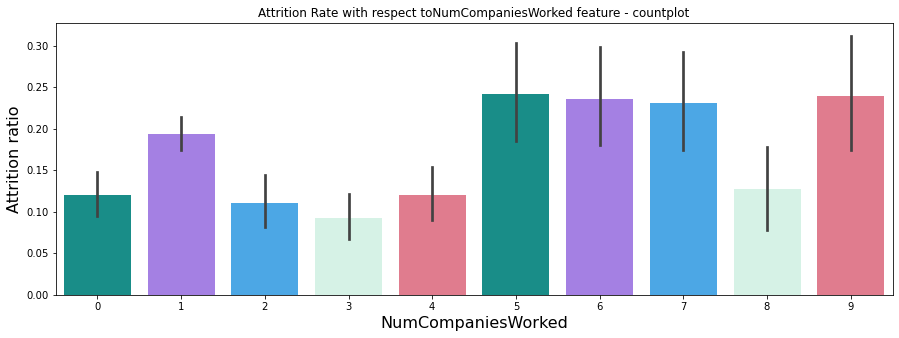

In [137]:
plotUnivariateBar('NumCompaniesWorked')

We see that employees that have worked for more than 5 companies are slightly more likely to leave than others, however, this is insignificant

## how does percent Salary hike affect Attrition Rate

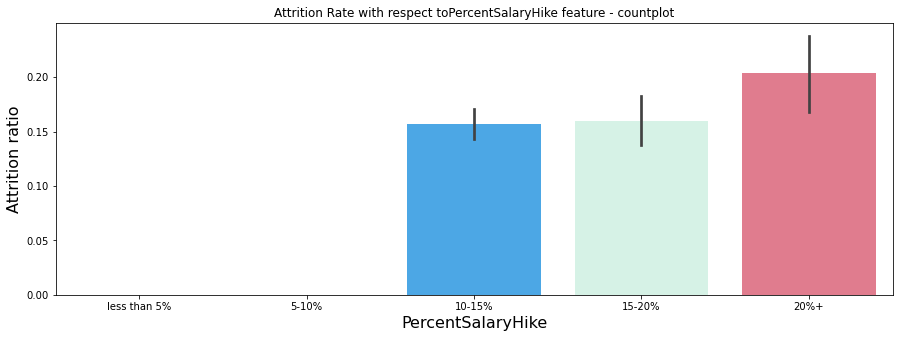

In [138]:
plotUnivariateBar('PercentSalaryHike')

One may assume that employees would be less likely yo leave after a significant increase in pay. However here we see the opposite trend

## Is performance Rating correlated with Attrition Rate

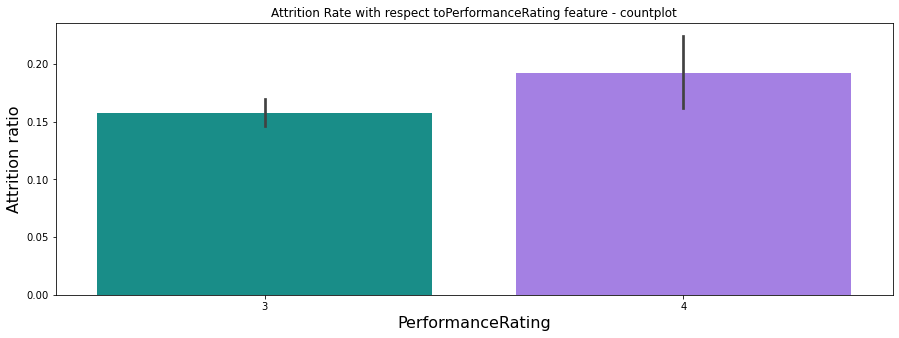

In [139]:
plotUnivariateBar('PerformanceRating')

## Is StockOptionLevel Correlated with Attrition Rate?

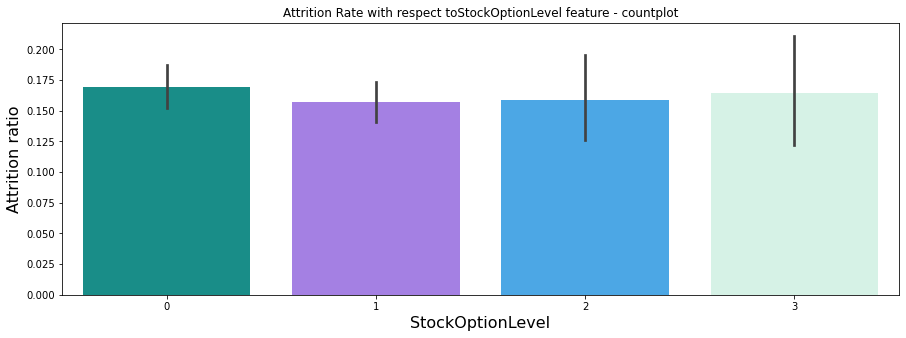

In [140]:
plotUnivariateBar('StockOptionLevel')

## Are total working years correlated with Attrition?

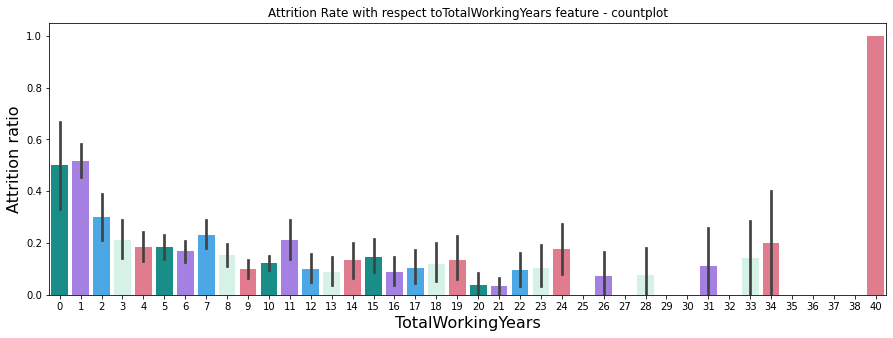

In [141]:
plotUnivariateBar('TotalWorkingYears')

### Is training correlated with Attrition

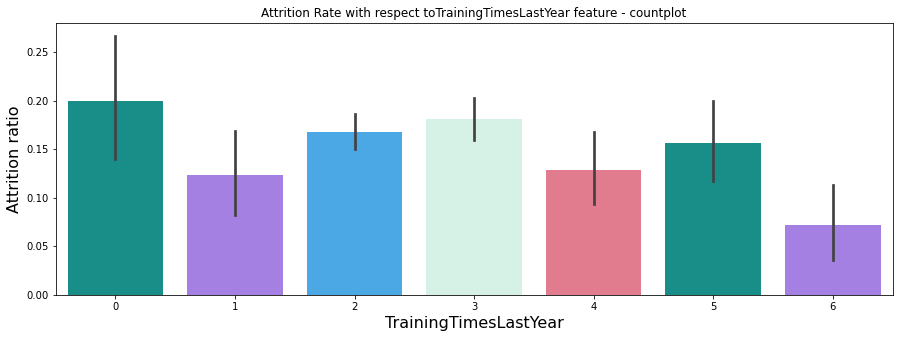

In [142]:
plotUnivariateBar('TrainingTimesLastYear')

### Is work life balance correlated with Attrition

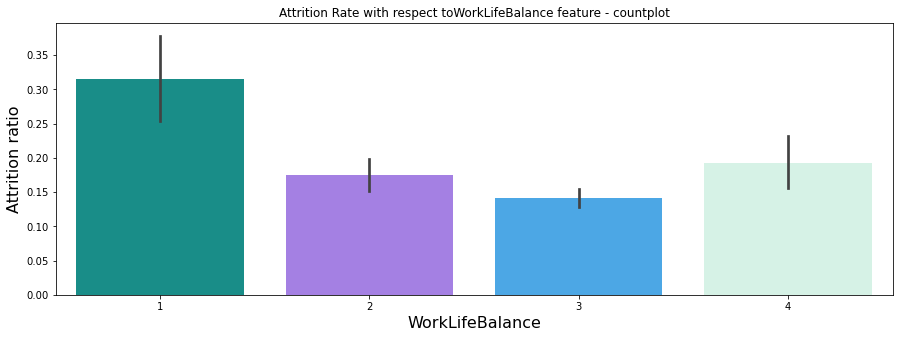

In [143]:
plotUnivariateBar('WorkLifeBalance')

We See employees that report poor work life balance are more than twice as likely to quit their occupation as those with greater levels of work life balance

## Correlation heatmap

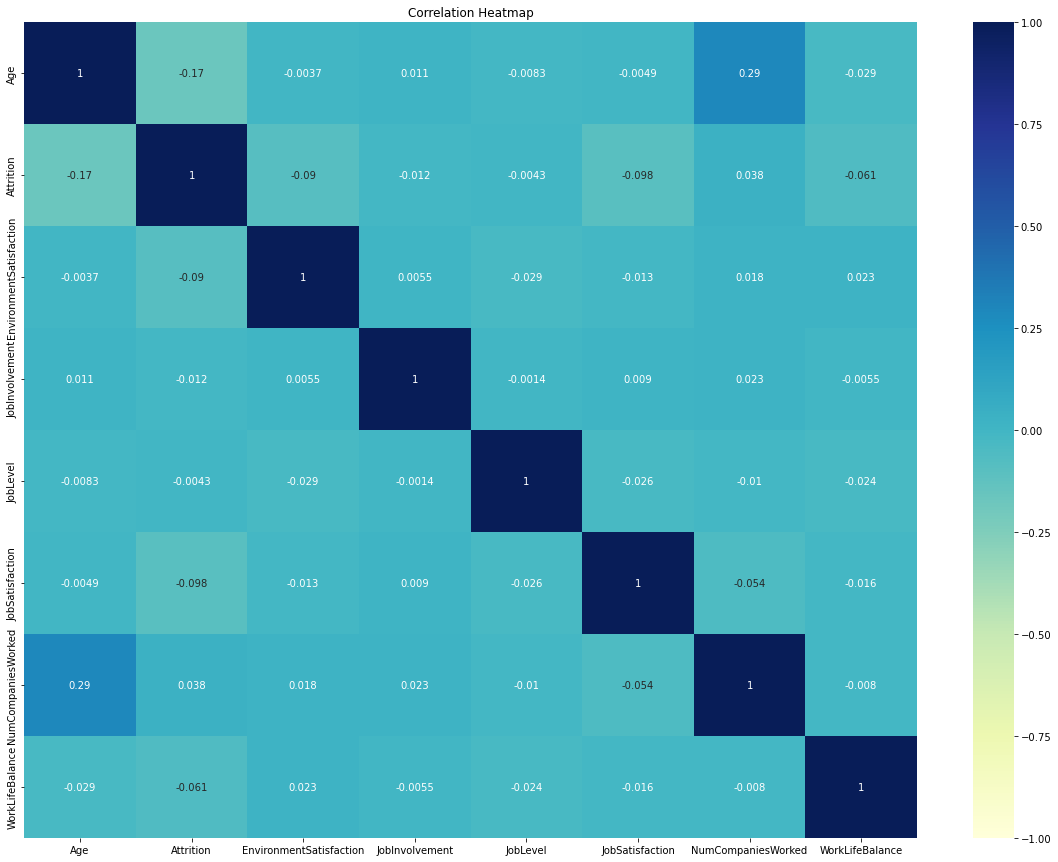

In [144]:
continuous_variables = ['Age','BusinessTravel','Attrition','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','NumCompaniesWorked','WorkLifeBalance']
corr_matrix = df[continuous_variables].corr()
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix,vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

## Export clean datasets

In [145]:
df.to_csv('hrdata.csv')


In [146]:
hrdf.to_csv('hrdf.csv')

In [81]:
hrs_worked.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
1,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,...,NaT,NaT,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
2,0 days 08:06:33,0 days 07:27:17,NaT,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days 07:36:47,0 days 07:43:39,...,0 days 07:55:42,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,NaT,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
3,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days 07:26:18,0 days 07:12:37,...,0 days 07:13:06,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11
4,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,0 days 06:52:36,0 days 06:54:28,...,0 days 07:27:21,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59
5,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,0 days 08:15:36,0 days 08:24:13,...,0 days 08:19:12,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05
